In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import spacy
import nltk
import seaborn as sns
import glob
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import itertools
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
!python -m spacy download el_core_news_sm

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [ ]:
kath = pd.read_csv('/content/kathimerini_full_articles.csv')
avgi = pd.read_csv('/content/avgi_full_articles.csv')
pro = pd.read_csv('/content/pronews_full_articles.csv')
it = pd.read_csv('/content/newsit_full_articles.csv')
skai = pd.read_csv('/content/skai_full_articles.csv')
vima = pd.read_csv('/content/tovima_full_articles.csv')
efsyn = pd.read_csv('/content/efsyn_full_articles.csv')

In [ ]:
all = pd.concat([kath, skai, it, vima, efsyn, avgi], axis=0)

In [ ]:
all.to_csv('/content/all.csv', index=False)

In [ ]:
all = pd.read_csv('/content/all.csv')

In [ ]:
all.drop('section', inplace=True, axis=1)

In [ ]:
all.drop('author', inplace=True, axis=1)

In [ ]:
textp = pro['full_text'].str.cat(sep = ' ')

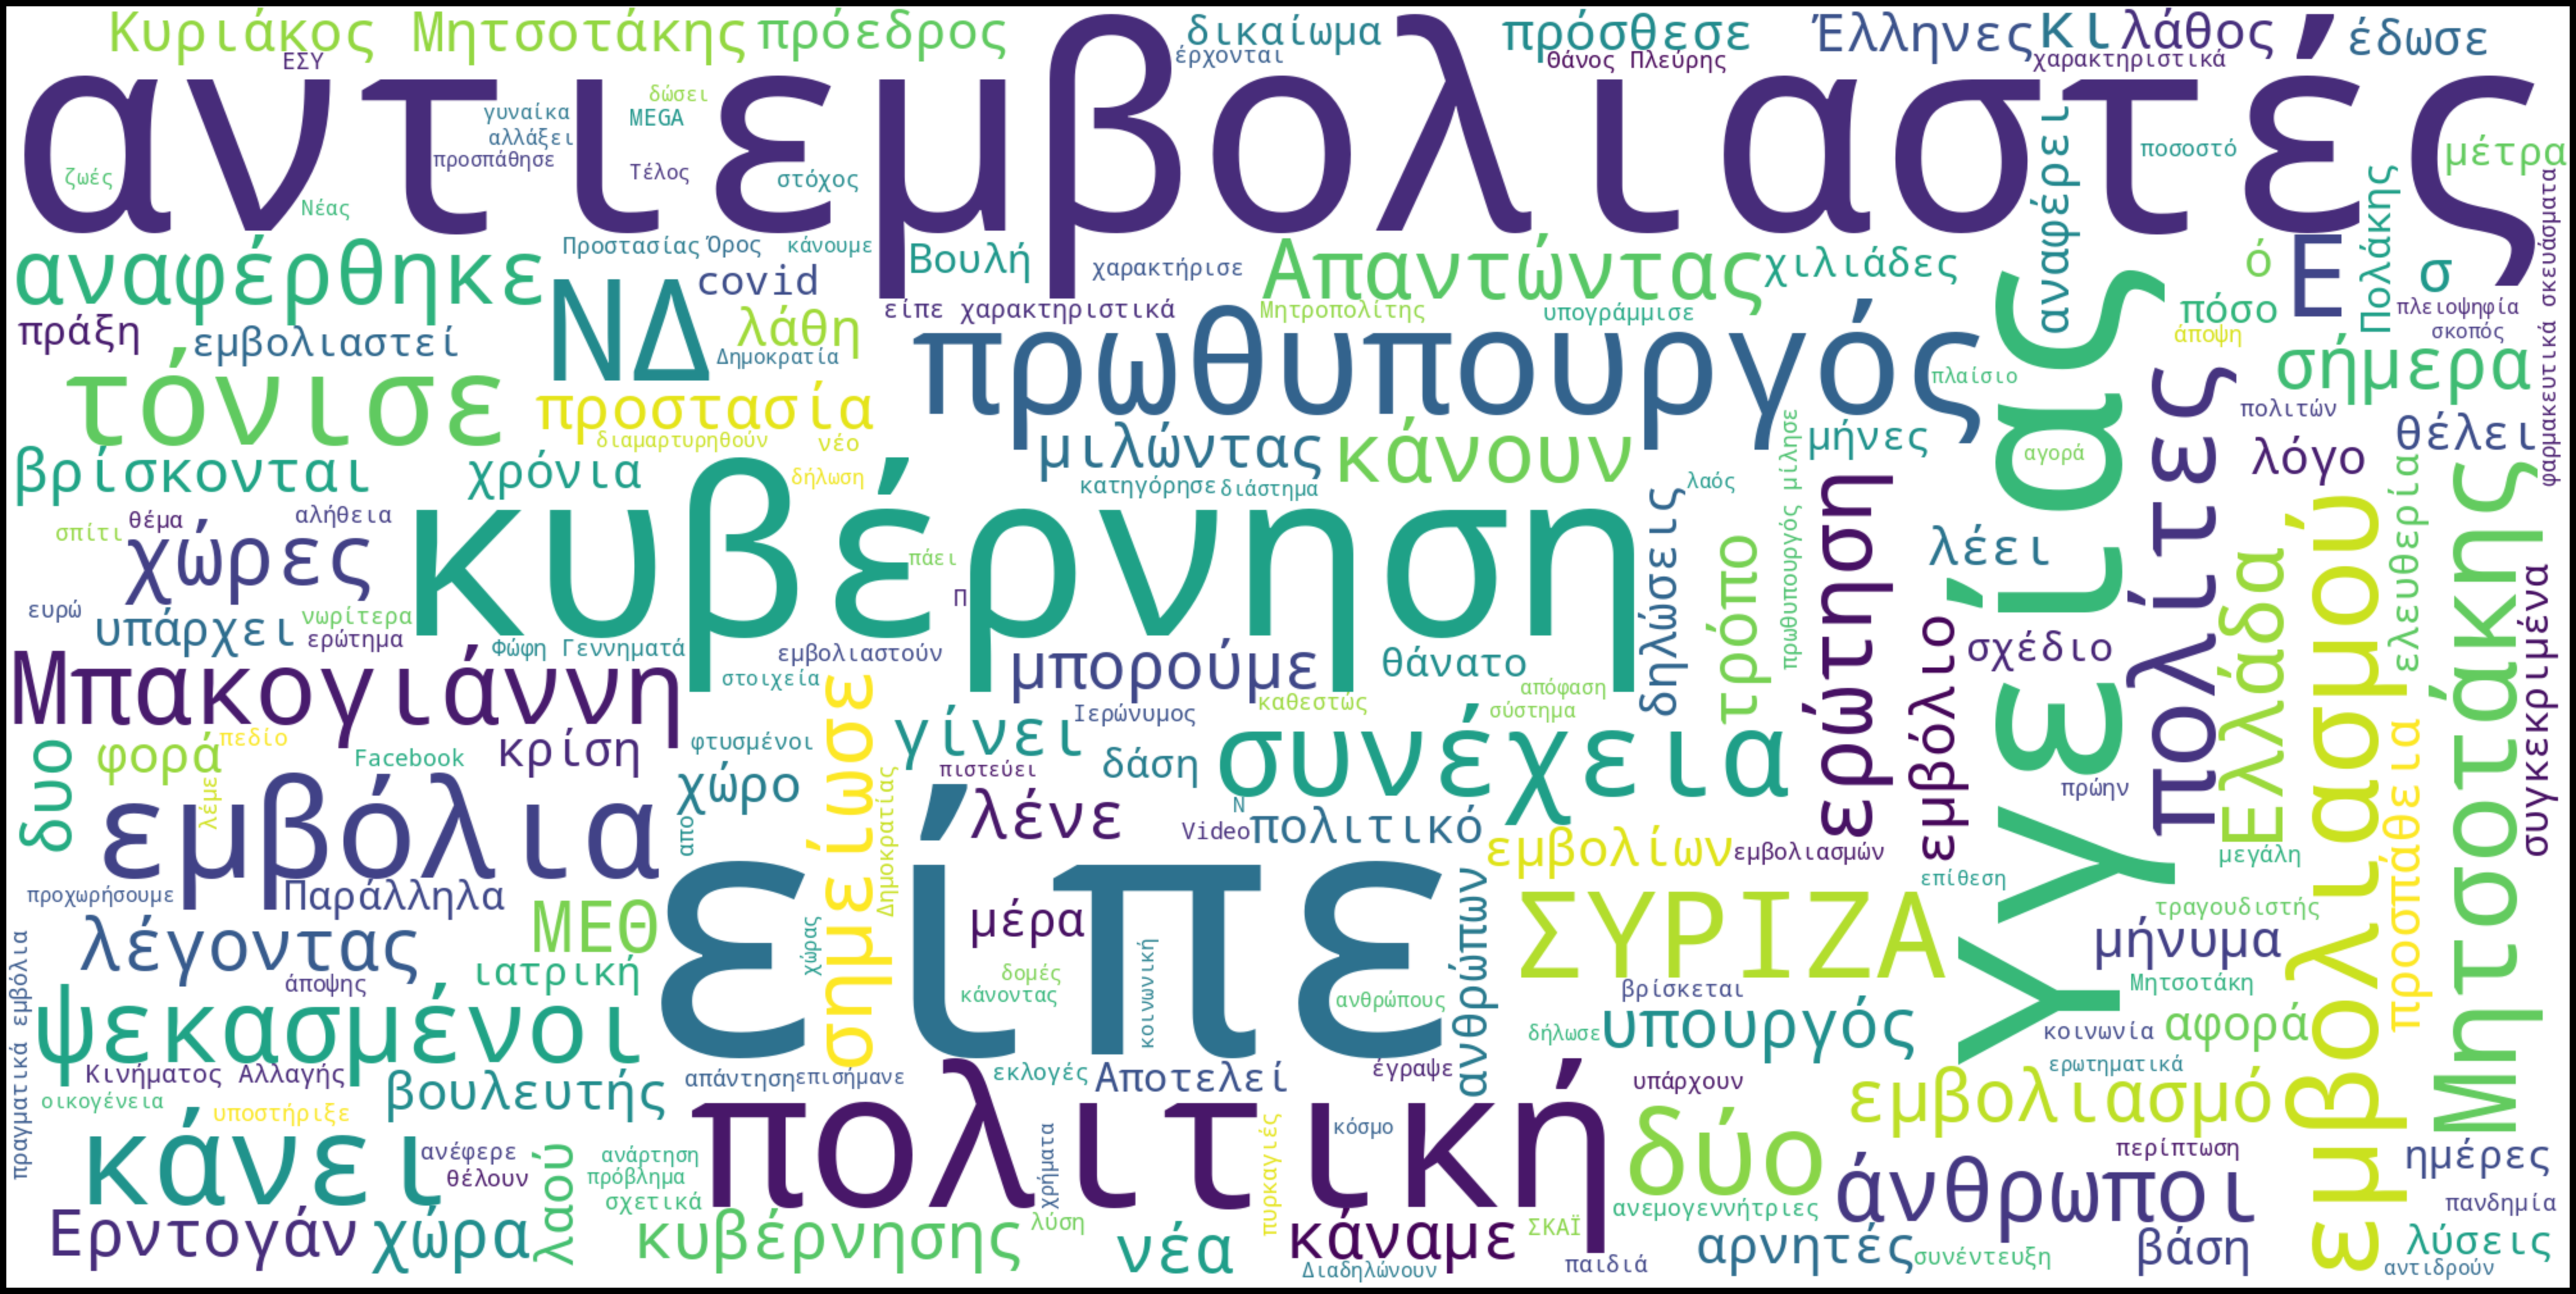

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(textp)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
textw = all['full_text'].str.cat(sep = ' ')

In [ ]:
nlp.Defaults.stop_words.update(['ή', 'κ'])

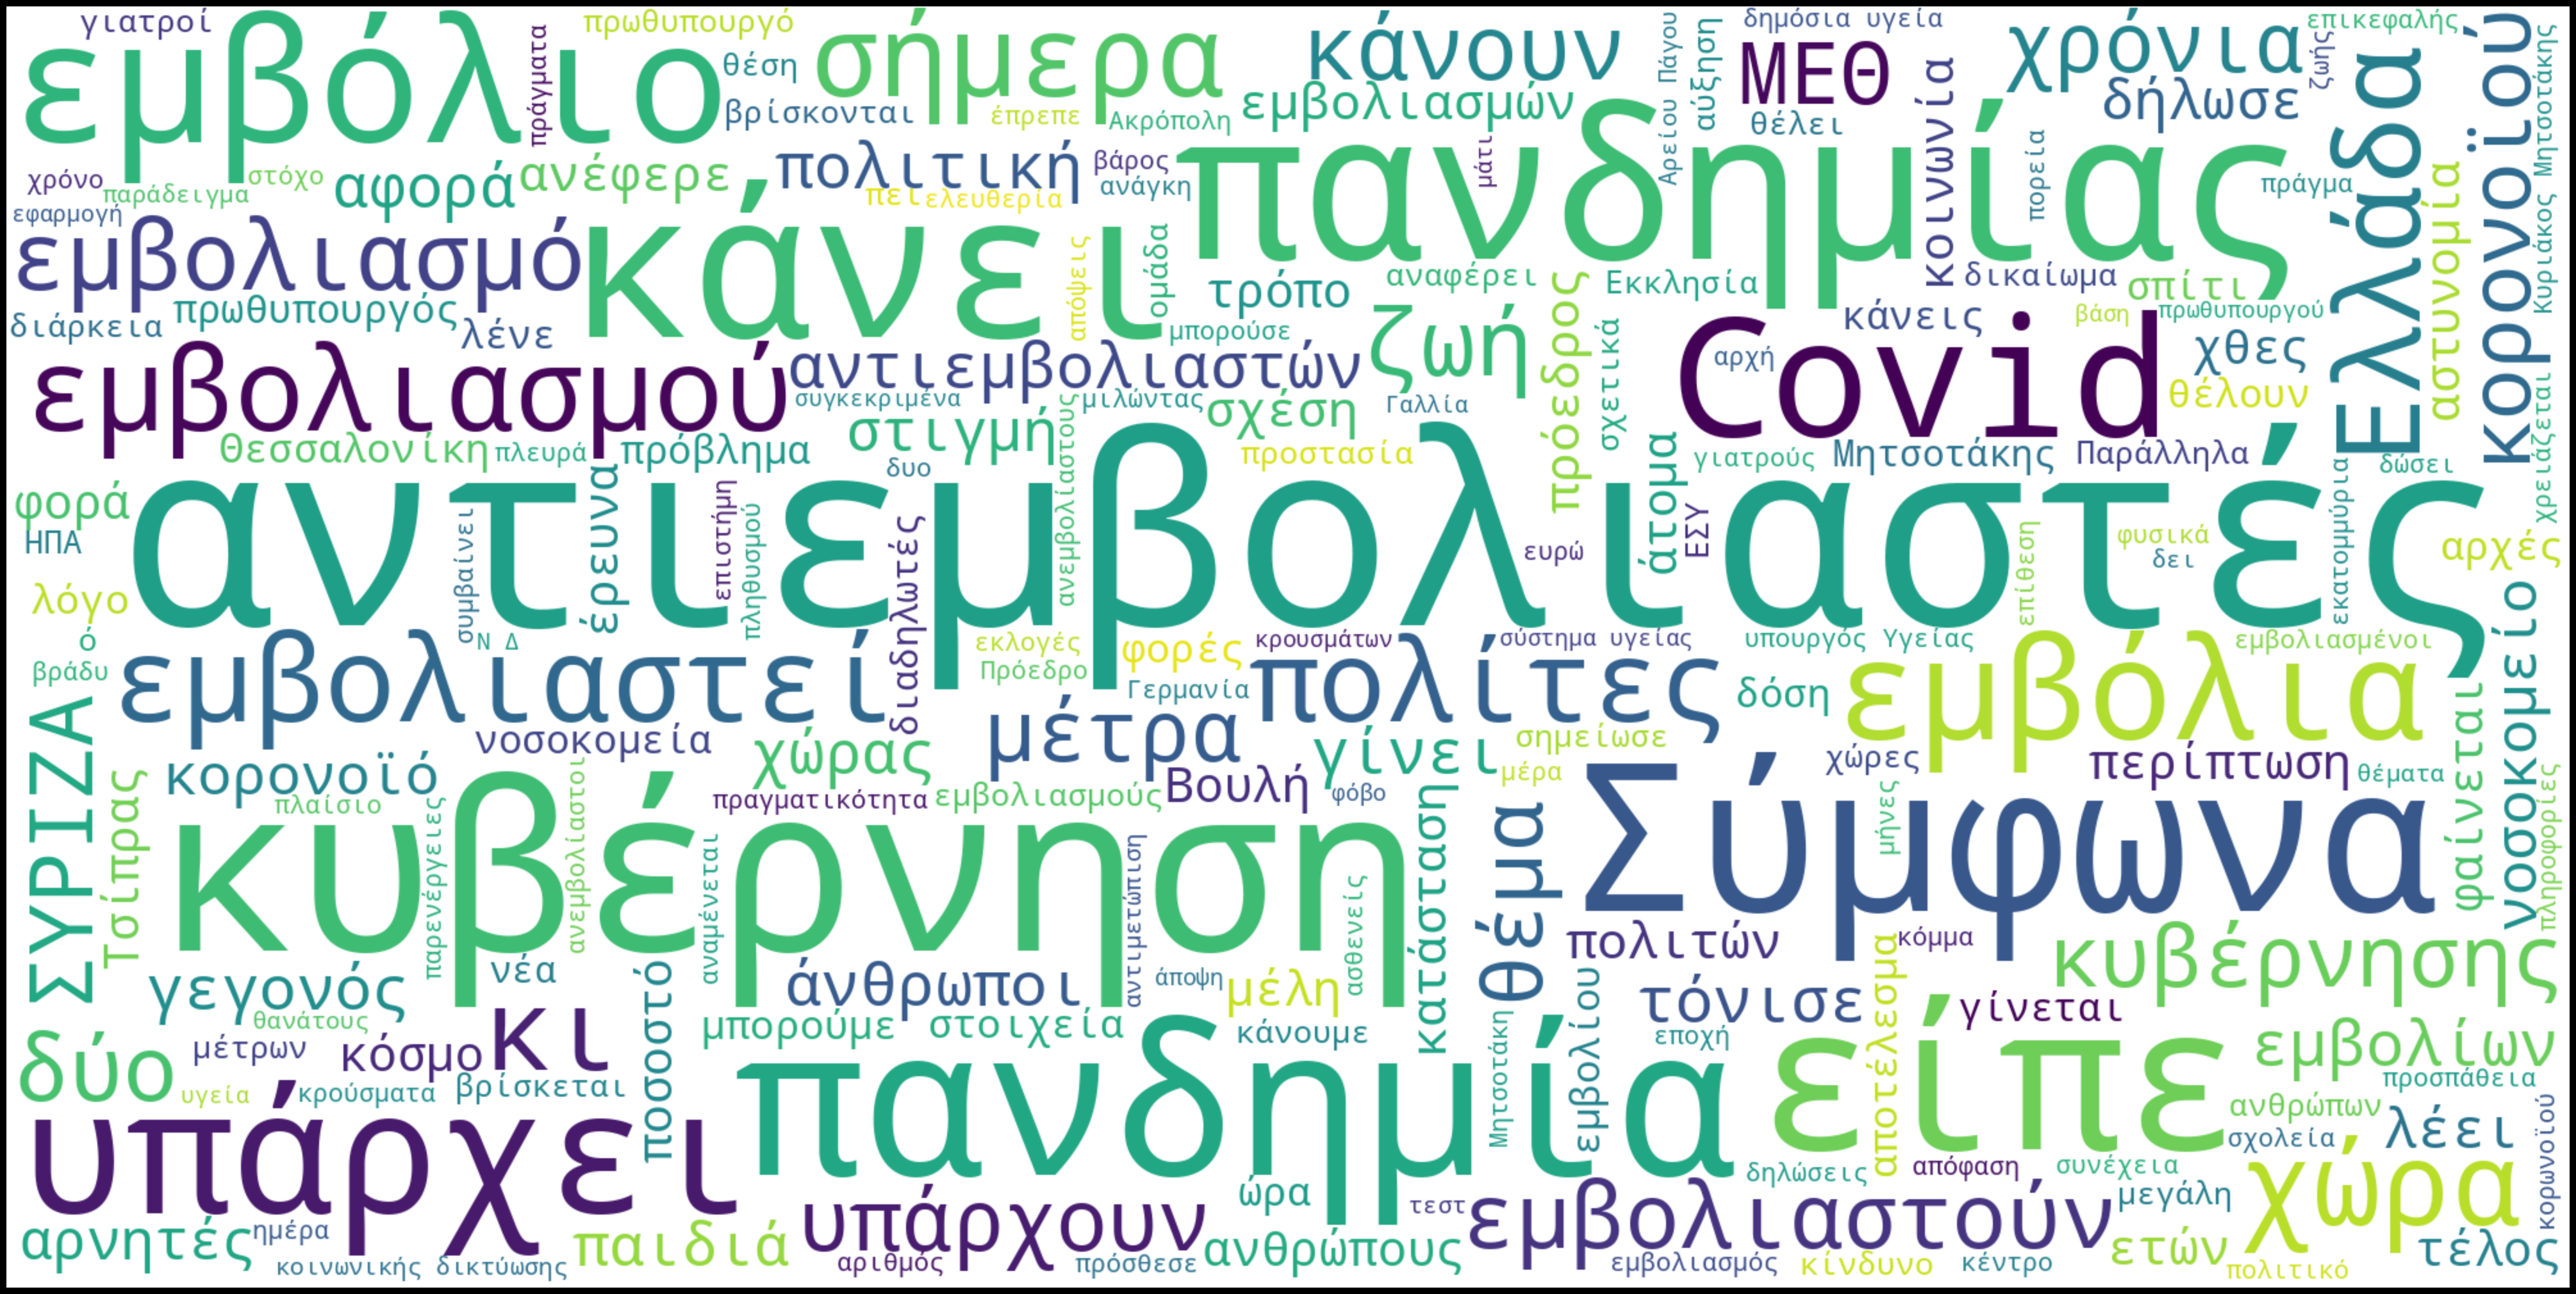

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(textw)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
pall = pd.concat([kath, skai, it, vima, efsyn, avgi, pro], axis=0)

In [ ]:
pall.to_csv('/content/pall.csv', index=False)

In [ ]:
pall = pd.read_csv('/content/pall.csv')

In [ ]:
pall.drop('section', inplace=True, axis=1)
pall.drop('author', inplace=True, axis=1)

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
palls = pall[['full_text', 'site']]

In [ ]:
palls = palls.rename(columns={'full_text': 'text'} )

In [ ]:
palls = palls.rename(columns={'site': 'ιστοσελίδα'} )

In [ ]:
palls = palls.replace(np.nan, '0')

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(palls['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)

In [ ]:
positive_words = emolex[emolex.Positive == 1]['word']

negative_words = emolex[emolex.Negative == 1]['word']

angry_words = emolex[emolex.Anger == 1]['word']

anticipation_words = emolex[emolex.Anticipation == 1]['word']

disgust_words = emolex[emolex.Disgust == 1]['word']

fear_words = emolex[emolex.Fear == 1]['word']

joy_words = emolex[emolex.Joy == 1]['word']

sadness_words = emolex[emolex.Sadness == 1]['word']

surprise_words = emolex[emolex.Surprise == 1]['word']

trust_words = emolex[emolex.Trust == 1]['word']

In [ ]:
palls['anger'] = wordcount_df[angry_words].sum(axis=1)

palls['positive'] = wordcount_df[positive_words].sum(axis=1)

palls['joy'] = wordcount_df[joy_words].sum(axis=1)

palls['disgust'] = wordcount_df[disgust_words].sum(axis=1)

palls['surprise'] = wordcount_df[surprise_words].sum(axis=1)

palls['trust'] = wordcount_df[trust_words].sum(axis=1)

palls['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

palls['sadness'] = wordcount_df[sadness_words].sum(axis=1)

palls['negative'] = wordcount_df[negative_words].sum(axis=1)

palls['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
palls.reset_index(inplace=True)
palls.set_index('ιστοσελίδα', inplace=True)
palls

level_0  index  \
ιστοσελίδα                       
kathimerini.gr        0      0   
kathimerini.gr        1      1   
kathimerini.gr        2      2   
kathimerini.gr        3      3   
kathimerini.gr        4      4   
...                 ...    ...   
pronews.gr          799    799   
pronews.gr          800    800   
pronews.gr          801    801   
pronews.gr          802    802   
pronews.gr          803    803   

                                                             text  anger  \
ιστοσελίδα                                                                 
kathimerini.gr  Οι ενδείξεις που συνδέουν το κόμμα-έκπληξη των...      2   
kathimerini.gr  Ο δράστης αρχικά πλησίασε τον Κόντε αφήνοντας ...      4   
kathimerini.gr  Πρόκειται για μέλος της πολιτικής δυναστείας τ...      1   
kathimerini.gr  Δύναται να υποστηριχθεί ότι οι αντιεμβολιαστές...     14   
kathimerini.gr  Facebook και Instagram αδυνατούν να εξαλείψουν...      4   
...                                                           ...    ...   
pronews.gr      Η Φώφη Γεννηματά αναφέρθηκε για ακόμη μία φορά...      6   
pronews.gr      «Σκληρή» απάντηση στους αντιεμβολιαστές έδωσε ...      3   
pronews.gr      Αποτελεί ακραίο φασισμό η προσπάθεια του Πρωθυ...      6   
pronews.gr      Ο Πάνος Κιάμος έγινε ο πρώτος καλλιτέχνης που ...      0   
pronews.gr      Καυστικός εμφανίστηκε ο καθηγητής Πολιτικής τη...      0   

                positive  joy  disgust  surprise  trust  anticipation  \
ιστοσελίδα                                                              
kathimerini.gr        21    6        2         6     17             9   
kathimerini.gr         0    0        3         0      2             0   
kathimerini.gr         6    0        2         0      4             1   
kathimerini.gr        21    7       10         5     18             9   
kathimerini.gr        11    4        4         2      6             3   
...                  ...  ...      ...       ...    ...           ...   
pronews.gr            17    0        2         0     14             3   
pronews.gr             8    1        3         1      7             3   
pronews.gr            15    3        5         3     10             3   
pronews.gr             4    0        0         0      3             0   
pronews.gr             3    0        3         2      1             1   

                sadness  negative  fear  (-)αρνητικότητα | θετικότητα(+)  
ιστοσελίδα                                                                
kathimerini.gr        1        12     8                             27.0  
kathimerini.gr        3         4     3                           -100.0  
kathimerini.gr        0         0     0                            100.0  
kathimerini.gr        2        18     1                              7.0  
kathimerini.gr        5        10     5                              5.0  
...                 ...       ...   ...                              ...  
pronews.gr            1        11     8                             21.0  
pronews.gr            3         5     2                             23.0  
pronews.gr            8        13     9                              7.0  
pronews.gr            0         2     0                             33.0  
pronews.gr            0         5     5                            -25.0  

[804 rows x 14 columns]

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')

In [ ]:
palls['(-)αρνητικότητα | θετικότητα(+)'] = palls.positive*100//palls[['positive','negative']].sum(axis=1) - palls.negative*100//palls[['positive','negative']].sum(axis=1)

<Axes: xlabel='ιστοσελίδα'>

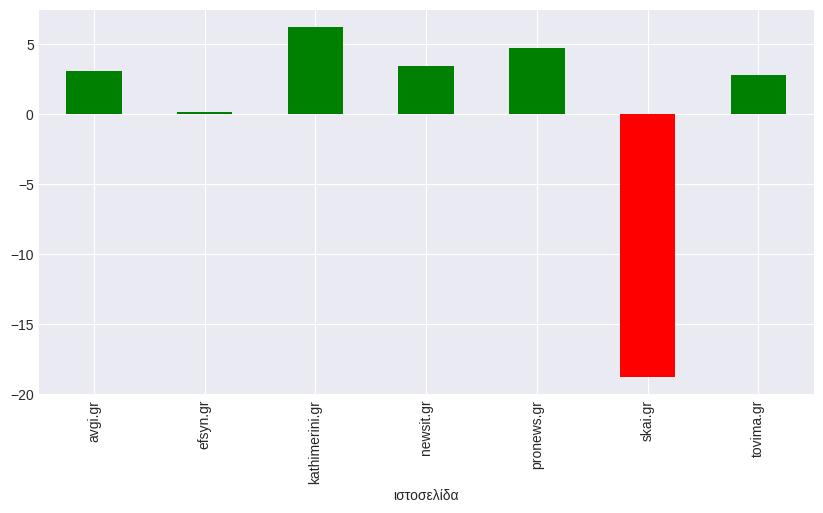

In [ ]:
palls['(-)αρνητικότητα | θετικότητα(+)'].groupby(by=palls.index).mean().plot(kind='bar',color=('green', 'green', 'green', 'green', 'green', 'red','green'), figsize=(10,5))

In [ ]:
palls['φόβος'] = palls.fear*100//palls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [ ]:
palls['θυμός'] = palls.anger*100//palls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [ ]:
palls['αηδία'] = palls.disgust*100//palls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [ ]:
palls['λύπη'] = palls.sadness*100//palls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [ ]:
palls['χαρά'] = palls.joy*100//palls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [ ]:
palls['εμπιστοσύνη'] = palls.trust*100//palls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [ ]:
palls['έκπληξη'] = palls.surprise*100//palls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [ ]:
palls['προσδοκία'] = palls.anticipation*100//palls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [ ]:
palls['οργή'] = palls['έκπληξη'] + palls['θυμός']

In [ ]:
palls['απέχθεια'] = palls['αηδία'] + palls['θυμός']

In [ ]:
palls['απελπισία'] = palls['λύπη'] + palls['φόβος']

In [ ]:
palls['ανησυχία'] = palls['προσδοκία'] + palls['φόβος']

In [ ]:
palls['επιθετικότητα'] = palls['προσδοκία'] + palls['θυμός']

In [ ]:
palls['ντροπή'] = palls['φόβος'] + palls['αηδία']

In [ ]:
palls

level_0  index  \
ιστοσελίδα                       
kathimerini.gr        0      0   
kathimerini.gr        1      1   
kathimerini.gr        2      2   
kathimerini.gr        3      3   
kathimerini.gr        4      4   
...                 ...    ...   
pronews.gr          799    799   
pronews.gr          800    800   
pronews.gr          801    801   
pronews.gr          802    802   
pronews.gr          803    803   

                                                             text  anger  \
ιστοσελίδα                                                                 
kathimerini.gr  Οι ενδείξεις που συνδέουν το κόμμα-έκπληξη των...      2   
kathimerini.gr  Ο δράστης αρχικά πλησίασε τον Κόντε αφήνοντας ...      4   
kathimerini.gr  Πρόκειται για μέλος της πολιτικής δυναστείας τ...      1   
kathimerini.gr  Δύναται να υποστηριχθεί ότι οι αντιεμβολιαστές...     14   
kathimerini.gr  Facebook και Instagram αδυνατούν να εξαλείψουν...      4   
...                                                           ...    ...   
pronews.gr      Η Φώφη Γεννηματά αναφέρθηκε για ακόμη μία φορά...      6   
pronews.gr      «Σκληρή» απάντηση στους αντιεμβολιαστές έδωσε ...      3   
pronews.gr      Αποτελεί ακραίο φασισμό η προσπάθεια του Πρωθυ...      6   
pronews.gr      Ο Πάνος Κιάμος έγινε ο πρώτος καλλιτέχνης που ...      0   
pronews.gr      Καυστικός εμφανίστηκε ο καθηγητής Πολιτικής τη...      0   

                positive  joy  disgust  surprise  trust  anticipation  ...  \
ιστοσελίδα                                                             ...   
kathimerini.gr        21    6        2         6     17             9  ...   
kathimerini.gr         0    0        3         0      2             0  ...   
kathimerini.gr         6    0        2         0      4             1  ...   
kathimerini.gr        21    7       10         5     18             9  ...   
kathimerini.gr        11    4        4         2      6             3  ...   
...                  ...  ...      ...       ...    ...           ...  ...   
pronews.gr            17    0        2         0     14             3  ...   
pronews.gr             8    1        3         1      7             3  ...   
pronews.gr            15    3        5         3     10             3  ...   
pronews.gr             4    0        0         0      3             0  ...   
pronews.gr             3    0        3         2      1             1  ...   

                αηδία  λύπη  χαρά  εμπιστοσύνη  έκπληξη  προσδοκία  οργή  \
ιστοσελίδα                                                                 
kathimerini.gr    3.0   1.0  11.0         33.0     11.0       17.0  14.0   
kathimerini.gr   20.0  20.0   0.0         13.0      0.0        0.0  26.0   
kathimerini.gr   25.0   0.0   0.0         50.0      0.0       12.0  12.0   
kathimerini.gr   15.0   3.0  10.0         27.0      7.0       13.0  28.0   
kathimerini.gr   12.0  15.0  12.0         18.0      6.0        9.0  18.0   
...               ...   ...   ...          ...      ...        ...   ...   
pronews.gr        5.0   2.0   0.0         41.0      0.0        8.0  17.0   
pronews.gr       13.0  13.0   4.0         30.0      4.0       13.0  17.0   
pronews.gr       10.0  17.0   6.0         21.0      6.0        6.0  18.0   
pronews.gr        0.0   0.0   0.0        100.0      0.0        0.0   0.0   
pronews.gr       25.0   0.0   0.0          8.0     16.0        8.0  16.0   

                απέχθεια  απελπισία  επιθετικότητα  
ιστοσελίδα                                          
kathimerini.gr       6.0       16.0           32.0  
kathimerini.gr      46.0       40.0           20.0  
kathimerini.gr      37.0        0.0           12.0  
kathimerini.gr      36.0        4.0           14.0  
kathimerini.gr      24.0       30.0           24.0  
...                  ...        ...            ...  
pronews.gr          22.0       25.0           31.0  
pronews.gr          26.0       21.0           21.0  
pronews.gr          22.0       36.0           25.0

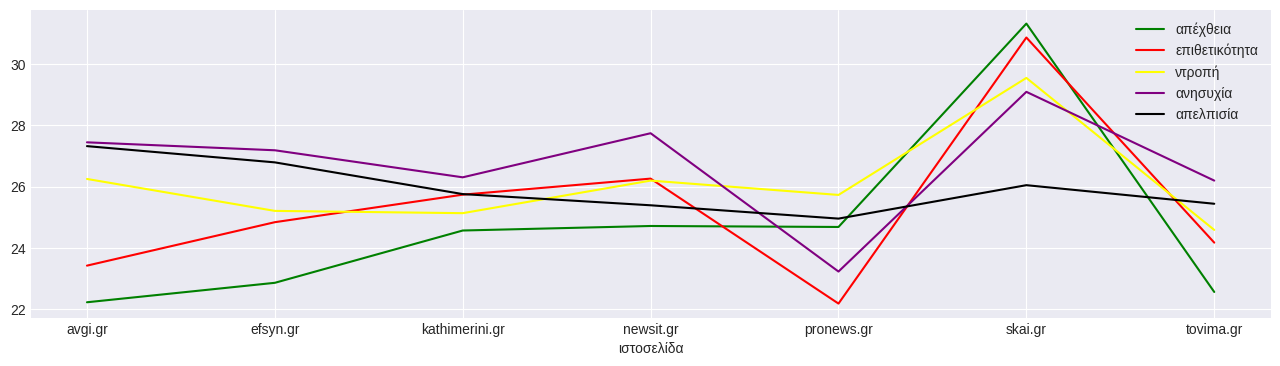

In [ ]:
ax = palls['απέχθεια'].groupby(by=palls.index).mean().plot(figsize=(16,4), label = 'απέχθεια', color = 'green')
palls['επιθετικότητα'].groupby(by=palls.index).mean().plot(figsize=(16,4), label = 'επιθετικότητα', color = 'red')
palls['ντροπή'].groupby(by=palls.index).mean().plot(figsize=(16,4), label = 'ντροπή', color = 'yellow')
palls['ανησυχία'].groupby(by=palls.index).mean().plot(figsize=(16,4), label = 'ανησυχία', color = 'purple')
palls['απελπισία'].groupby(by=palls.index).mean().plot(figsize=(16,4), label = 'απελπισία', color = 'black').legend()